In [1]:
!python -m spacy download en_core_web_md

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


2022-09-12 23:26:42.493904: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-12 23:26:42.493976: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-12 23:26:54.327259: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-09-12 23:26:54.328531: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublas64_11.dll'; dlerror: cublas64_11.dll not found
2022-09-12 23:26:54.329752: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cublasLt64_11.dll'; dlerror: cublasLt64_11.dll not found
2022-09-12 23:26:54.331014: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cu

In [2]:
!pip install nltk

In [3]:
!pip install spacy

In [4]:
!pip install wordcloud

In [52]:
import pandas as pd
import numpy as np
import string  #special operations on string
import spacy   #language model
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [6]:
book=pd.read_csv("Elon_musk.csv",encoding= 'latin1',error_bad_lines=False)
book

C:\Users\DELL\AppData\Local\Temp\ipykernel_6156\291927786.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv("Elon_musk.csv",encoding= 'latin1',error_bad_lines=False)


Unnamed: 0                                               Text
0              1                             @kunalb11 Im an alien
1              2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2              3                @joerogan @Spotify Great interview!
3              4                    @gtera27 Doge is underestimated
4              5  @teslacn Congratulations Tesla China for amazi...
...          ...                                                ...
1994        1995  @flcnhvy True, it sounds so surreal, but the n...
1995        1996  @PPathole Make sure to read ur terms &amp; con...
1996        1997                @TeslaGong @PPathole Samwise Gamgee
1997        1998  @PPathole Altho Dumb and Dumber is <U+0001F525...
1998        1999                          Progress update August 28

[1999 rows x 2 columns]

In [7]:
book.shape

(1999, 2)

In [8]:
book=[Text.strip() for Text in book.Text] #for leading and trailing characters
book

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [9]:
book = [x for x in book if x] # removes empty strings, because they are considered in Python as False
book       

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [10]:
#join the list in one string/text
text=''.join(book)
text

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?@joerogan @Spotify Great interview!@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!Happy New Year of the Ox! https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is 

In [12]:
#Punctuation

# with arguments (x, y, z)
# where 'x' and 'y' must be equal-length strings
# and characters in 'x' are replaced by characters in 'y'.
# 'z' is a string to be deleted (string.punctuation here)

no_punc_text=text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'kunalb11 I\x92m an alienIDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried itjoerogan Spotify Great interviewgtera27 Doge is underestimatedteslacn Congratulations Tesla China for amazing execution last year Now on to the next for even moreHappy New Year of the Ox httpstco9WFKMYu2ojFrodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10 Haha thanks flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocationThe most entertaining outcome is the most likelyGiveDirectly Just sent someJust agree to do Clubhouse with kanyewesthttpstco3rWE9uHSTSgeoffkeighley UnrealEngine It\x92s getting realBought some Dogecoin for lil X so he can be a toddler hodlerJoshManMode He definitely has issues but the sentencing seems a bit highfreewalletorg Thanks for fixingfreewalletorg Please unlock my accountAstroJordy U0001F923U0001F923This is true power haha httpstcoFc9uhQSd7Ofreewalletorg Any crypto wa

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [15]:
#tokenization
from nltk.tokenize import word_tokenize

text_tokens=word_tokenize(no_punc_text)

In [16]:
len(text_tokens)

19095

In [17]:
#Remove stopwards
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
my_stop_words=stopwords.words('english')

In [19]:
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [20]:
#simplified look of the no_stops_tooks for loops
""" final_words = []
  for word in text_tokens:
   if word in my_stop_words:
     'do nothing'
   else:
     final_words.append(word)"""


no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['kunalb11', 'I\x92m', 'alienIDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'itjoerogan', 'Spotify', 'Great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'moreHappy', 'New', 'Year', 'Ox', 'httpstco9WFKMYu2ojFrodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'httpstcozGxJFDzzrMOwenSparks', 'flcnhvy', 'anonyx10']


In [21]:
#Normalize the data
lower_words=(x.lower() for x in no_stop_tokens)

In [22]:
print(lower_words)

<generator object <genexpr> at 0x0000025B774496D0>


In [23]:
#stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(words) for words in lower_words]


In [24]:
print(stemmed_tokens)

['kunalb11', 'i\x92m', 'alienidaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'itjoerogan', 'spotifi', 'great', 'interviewgtera27', 'doge', 'underestimatedteslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'morehappi', 'new', 'year', 'ox', 'httpstco9wfkmyu2ojfrodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'httpstcozgxjfdzzrmowenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'allocationth', 'entertain', 'outcom', 'likelygivedirectli', 'just', 'sent', 'somejust', 'agre', 'clubhous', 'kanyewesthttpstco3rwe9uhstsgeoffkeighley', 'unrealengin', 'it\x92', 'get', 'realbought', 'dogecoin', 'lil', 'x', 'toddler', 'hodlerjoshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'highfreewalletorg', 'thank', 'fixingfreewalletorg', 'pleas', 'unlock', 'accountastrojordi', 'u0001f923u0001f923thi', 'true', 'power', 'haha'

In [25]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [26]:
#lemmas being one of the most,but mostly POS which will follow later
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

kunalb11 Im alienIDAACarmack Ray tracing Cyberpunk HDR nextlevel Have tried itjoerogan Spotify Great interviewgtera27 Doge underestimatedteslacn Congratulations Tesla China amazing execution last year Now next even moreHappy New Year Ox httpstco9WFKMYu2ojFrodo underdoge All thought would fail Himself httpstcozGxJFDzzrMOwenSparks flcnhvy anonyx10


In [27]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['kunalb11', 'i\x92m', 'alienidaacarmack', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'itjoerogan', 'spotify', 'great', 'interviewgtera27', 'Doge', 'underestimatedteslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next']


## feature extraction

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer()
x=vectorizer.fit_transform(lemmas)

In [29]:
pd.DataFrame(vectorizer.vocabulary_, columns=vectorizer.vocabulary_.keys())

ValueError: If using all scalar values, you must pass an index

In [30]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(20)

0
ðogecoin             5543
zzcool               5542
zonrt                5541
zone                 5540
zogfotpik            5539
zip2                 5538
zerotrungtphan       5537
zerocerberu21014829  5536
zero                 5535
zenit                5534
zealand              5533
zainraz4             5532
yupteslagong         5531
yuprt                5530
yupppathole          5529
yupjbuttermost       5528
yupflcnhvy           5527
yupfallout           5526
yupevafoxu           5525
yupengineersfeed     5524

In [31]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(20)

0
005                  0
10                   1
100                  2
1000                 3
10000                4
107                  5
10x                  6
11                   7
112charliemunger00   8
11erdayastronaut     9
11thhour            10
12                  11
122                 12
13                  13
130pm               14
13ericralph31       15
13model             16
13teslarati         17
14                  18
140pm               19

In [32]:
print(vectorizer.vocabulary_)

{'kunalb11': 2874, 'alienidaacarmack': 248, 'ray': 3882, 'trace': 4875, 'cyberpunk': 1015, 'hdr': 1854, 'nextlevel': 3376, 'have': 1849, 'try': 4938, 'itjoerogan': 2762, 'spotify': 4429, 'great': 1750, 'interviewgtera27': 2729, 'doge': 1177, 'underestimatedteslacn': 5138, 'congratulations': 890, 'tesla': 4680, 'china': 772, 'amazing': 276, 'execution': 1424, 'last': 2895, 'year': 5453, 'now': 3422, 'next': 3375, 'even': 1377, 'morehappy': 3275, 'new': 3373, 'ox': 3552, 'httpstco9wfkmyu2ojfrodo': 2041, 'underdoge': 5137, 'all': 251, 'thought': 4769, 'would': 5416, 'fail': 1462, 'himself': 1900, 'httpstcozgxjfdzzrmowenspark': 2555, 'flcnhvy': 1549, 'anonyx10': 306, 'haha': 1791, 'thank': 4720, 'indeed': 2653, 'tweets': 4962, 'definitely': 1072, 'represent': 3964, 'realworld': 3909, 'time': 4791, 'allocationthe': 255, 'entertaining': 1332, 'outcome': 3526, 'likelygivedirectly': 2964, 'just': 2826, 'send': 4166, 'somejust': 4341, 'agree': 217, 'clubhouse': 808, 'kanyewesthttpstco3rwe9uhsts

In [33]:
print(vectorizer.get_feature_names())

['005', '10', '100', '1000', '10000', '107', '10x', '11', '112charliemunger00', '11erdayastronaut', '11thhour', '12', '122', '13', '130pm', '13ericralph31', '13model', '13teslarati', '14', '140pm', '149watt', '14yearold', '15', '150', '155', '16', '162', '17', '17businessinsider', '18', '1880s', '1b', '1rt', '1st', '1stout', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2020erdayastronaut', '2021', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240am', '25', '250', '250kw', '25d', '25gunsteslacomchadhurley', '25k', '25th', '28', '28ai', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3brianheide', '3d', '3rd', '40', '400', '4227', '42u0001f917rt', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '50', '50000', '50k', '5ercxspace', '60', '60000', '65', '69420', '6f', '6ki', '727', '727pm', '74', '74http

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [34]:
print(x.toarray()[50:100])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [35]:
print(x.toarray().shape)

(13878, 5544)


## Let's see how can bigrams and trigrams can be included here

In [36]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',
                                      ngram_range=(1,3),
                                      max_features=100)

In [37]:
bow_matri_ngram=vectorizer_ngram_range.fit_transform(book)
bow_matri_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [38]:
print(vectorizer_ngram_range.get_feature_names())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']


In [40]:
print(bow_matri_ngram.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Tf-idf vectorizer

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features=TfidfVectorizer(norm='l2',
                                             analyzer='word',
                                             ngram_range=(1,3),
                                              max_features = 10)


In [45]:
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(book)

In [46]:
print(vectorizer_n_gram_max_features.get_feature_names())

['amp', 'co', 'https', 'https co', 'in', 'is', 'of', 'spacex', 'the', 'to']


In [47]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Generate wordcloud

In [48]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    # Set figure size
    plt.figure(figsize=(60, 40))

    # Display image
    plt.imshow(wordcloud) 
    
    # No axis details
    plt.axis("off")

In [49]:
stopwords = STOPWORDS
stopwords.add('will')
stopwords.add('apple')
stopwords.add('Amazon')
stopwords.add('laptop')

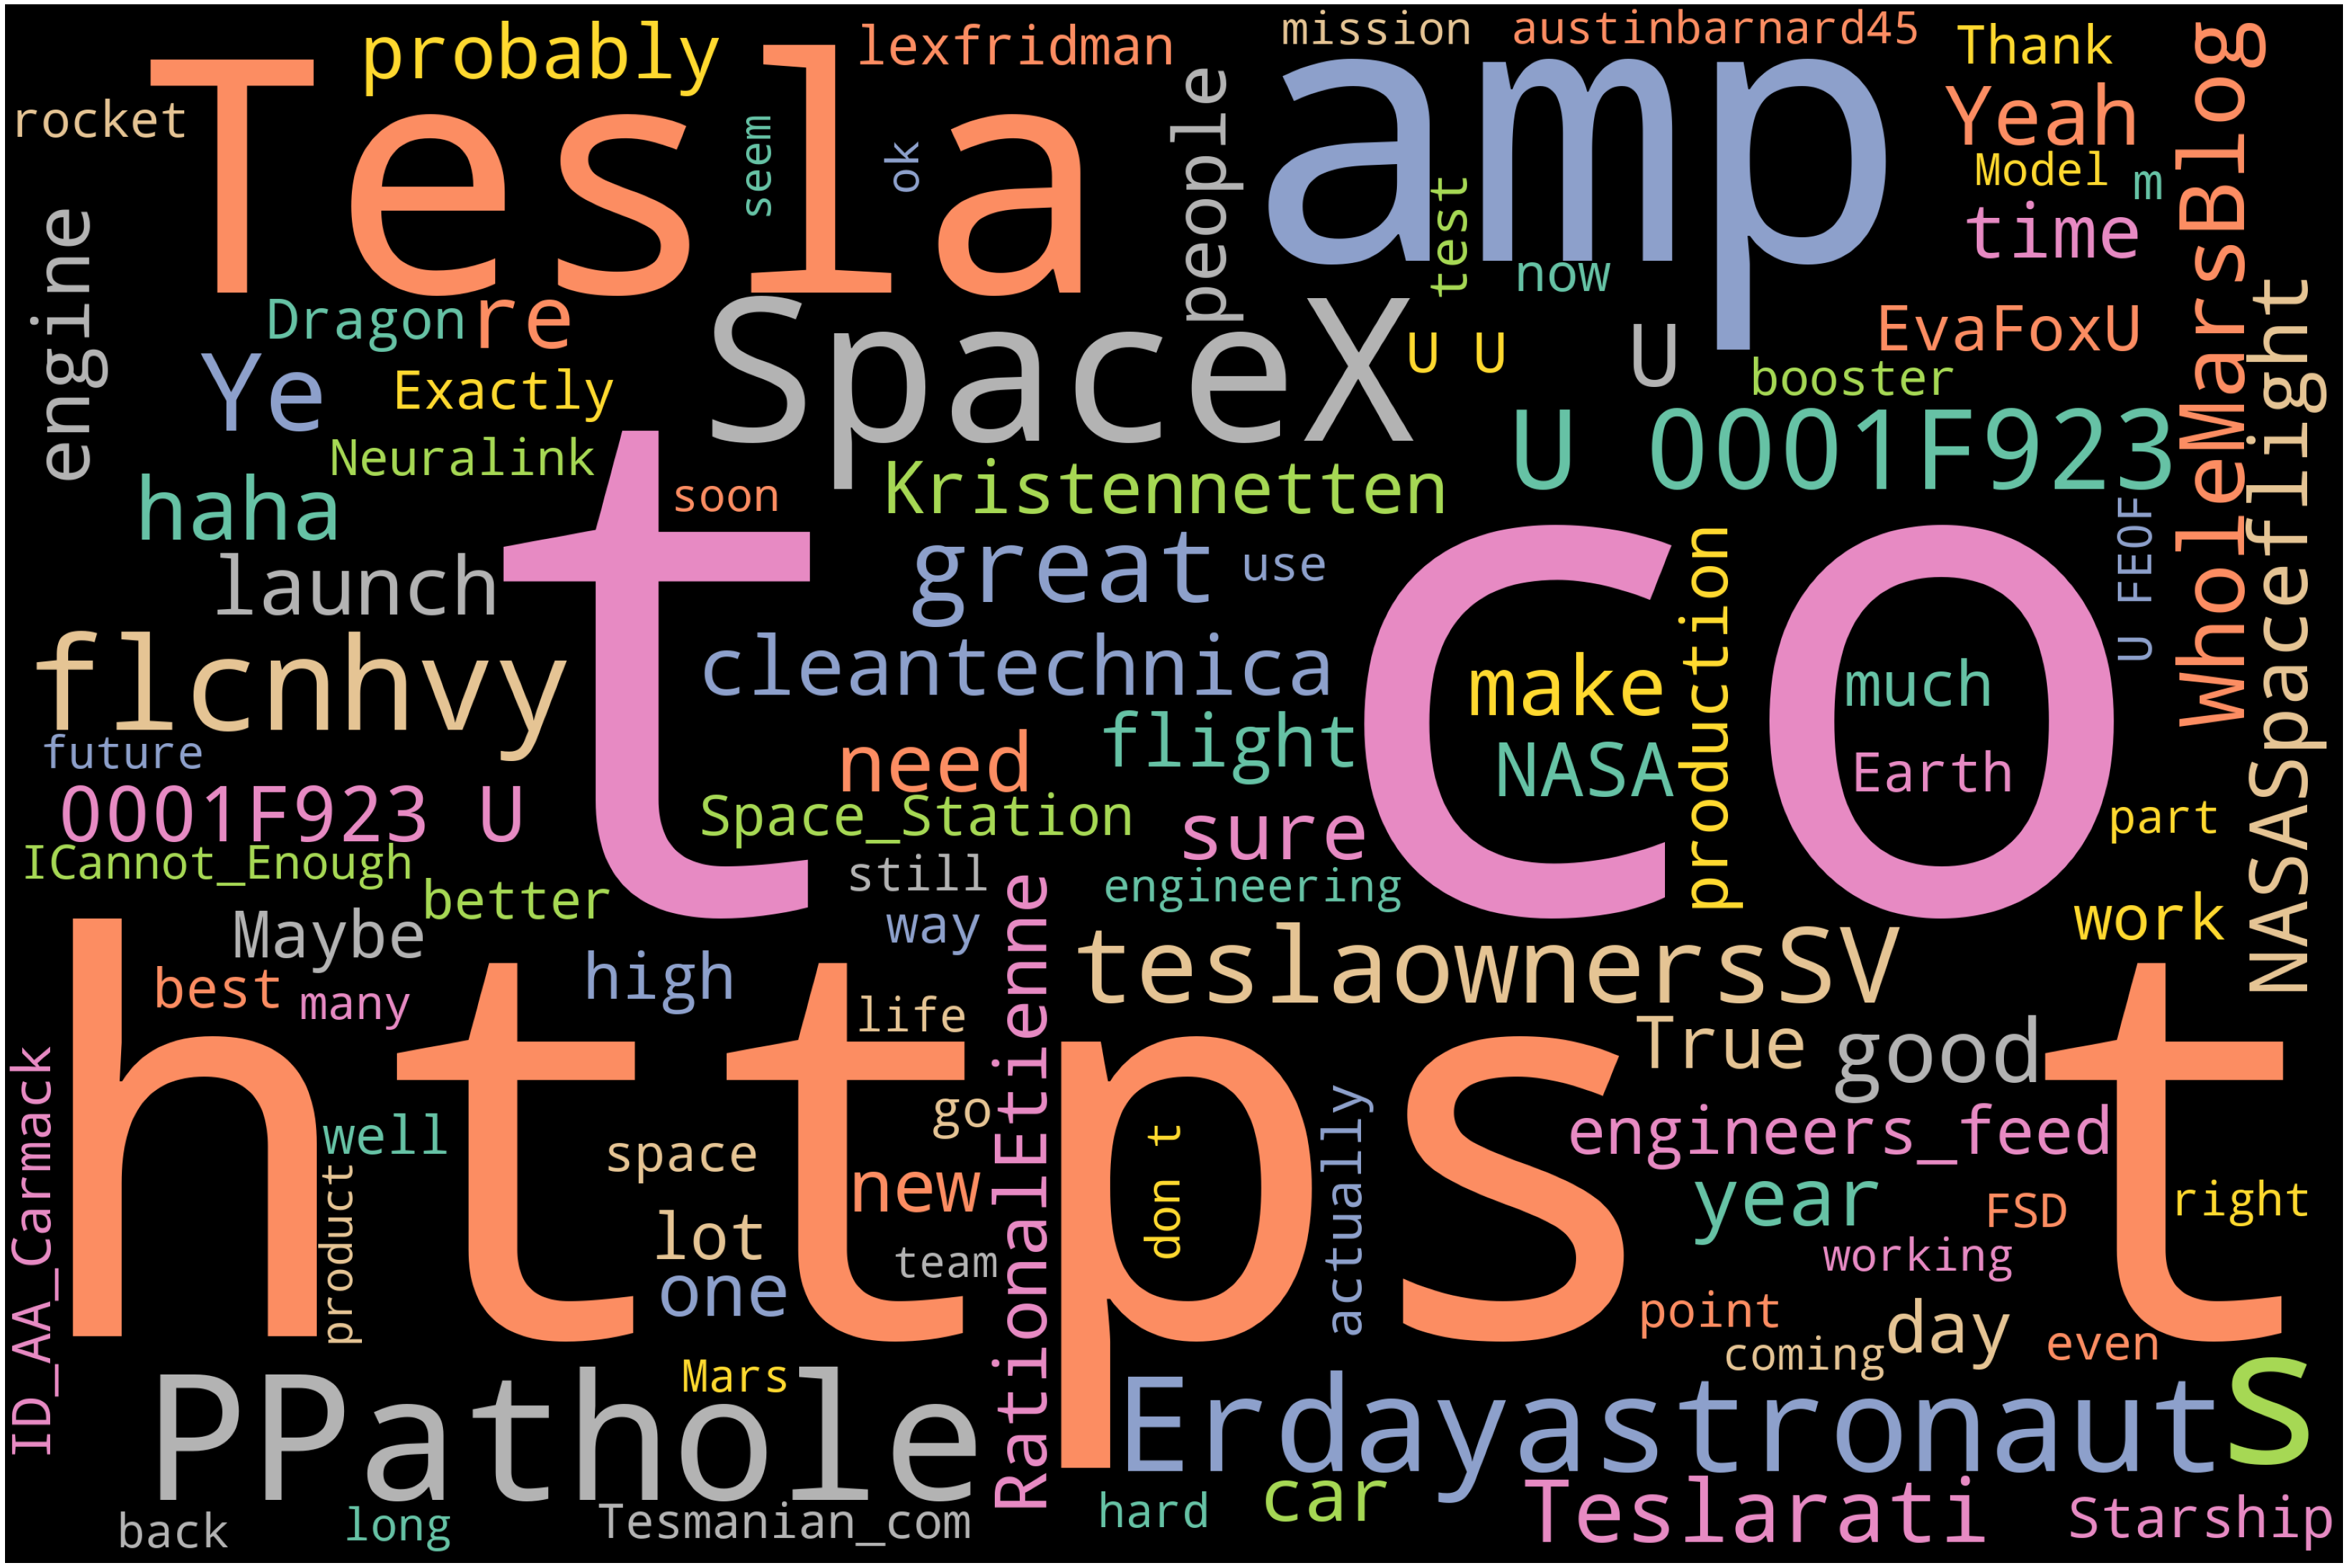

In [57]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000,
                      background_color='black',
                      max_words=100,
                      colormap='Set2',
                      stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)

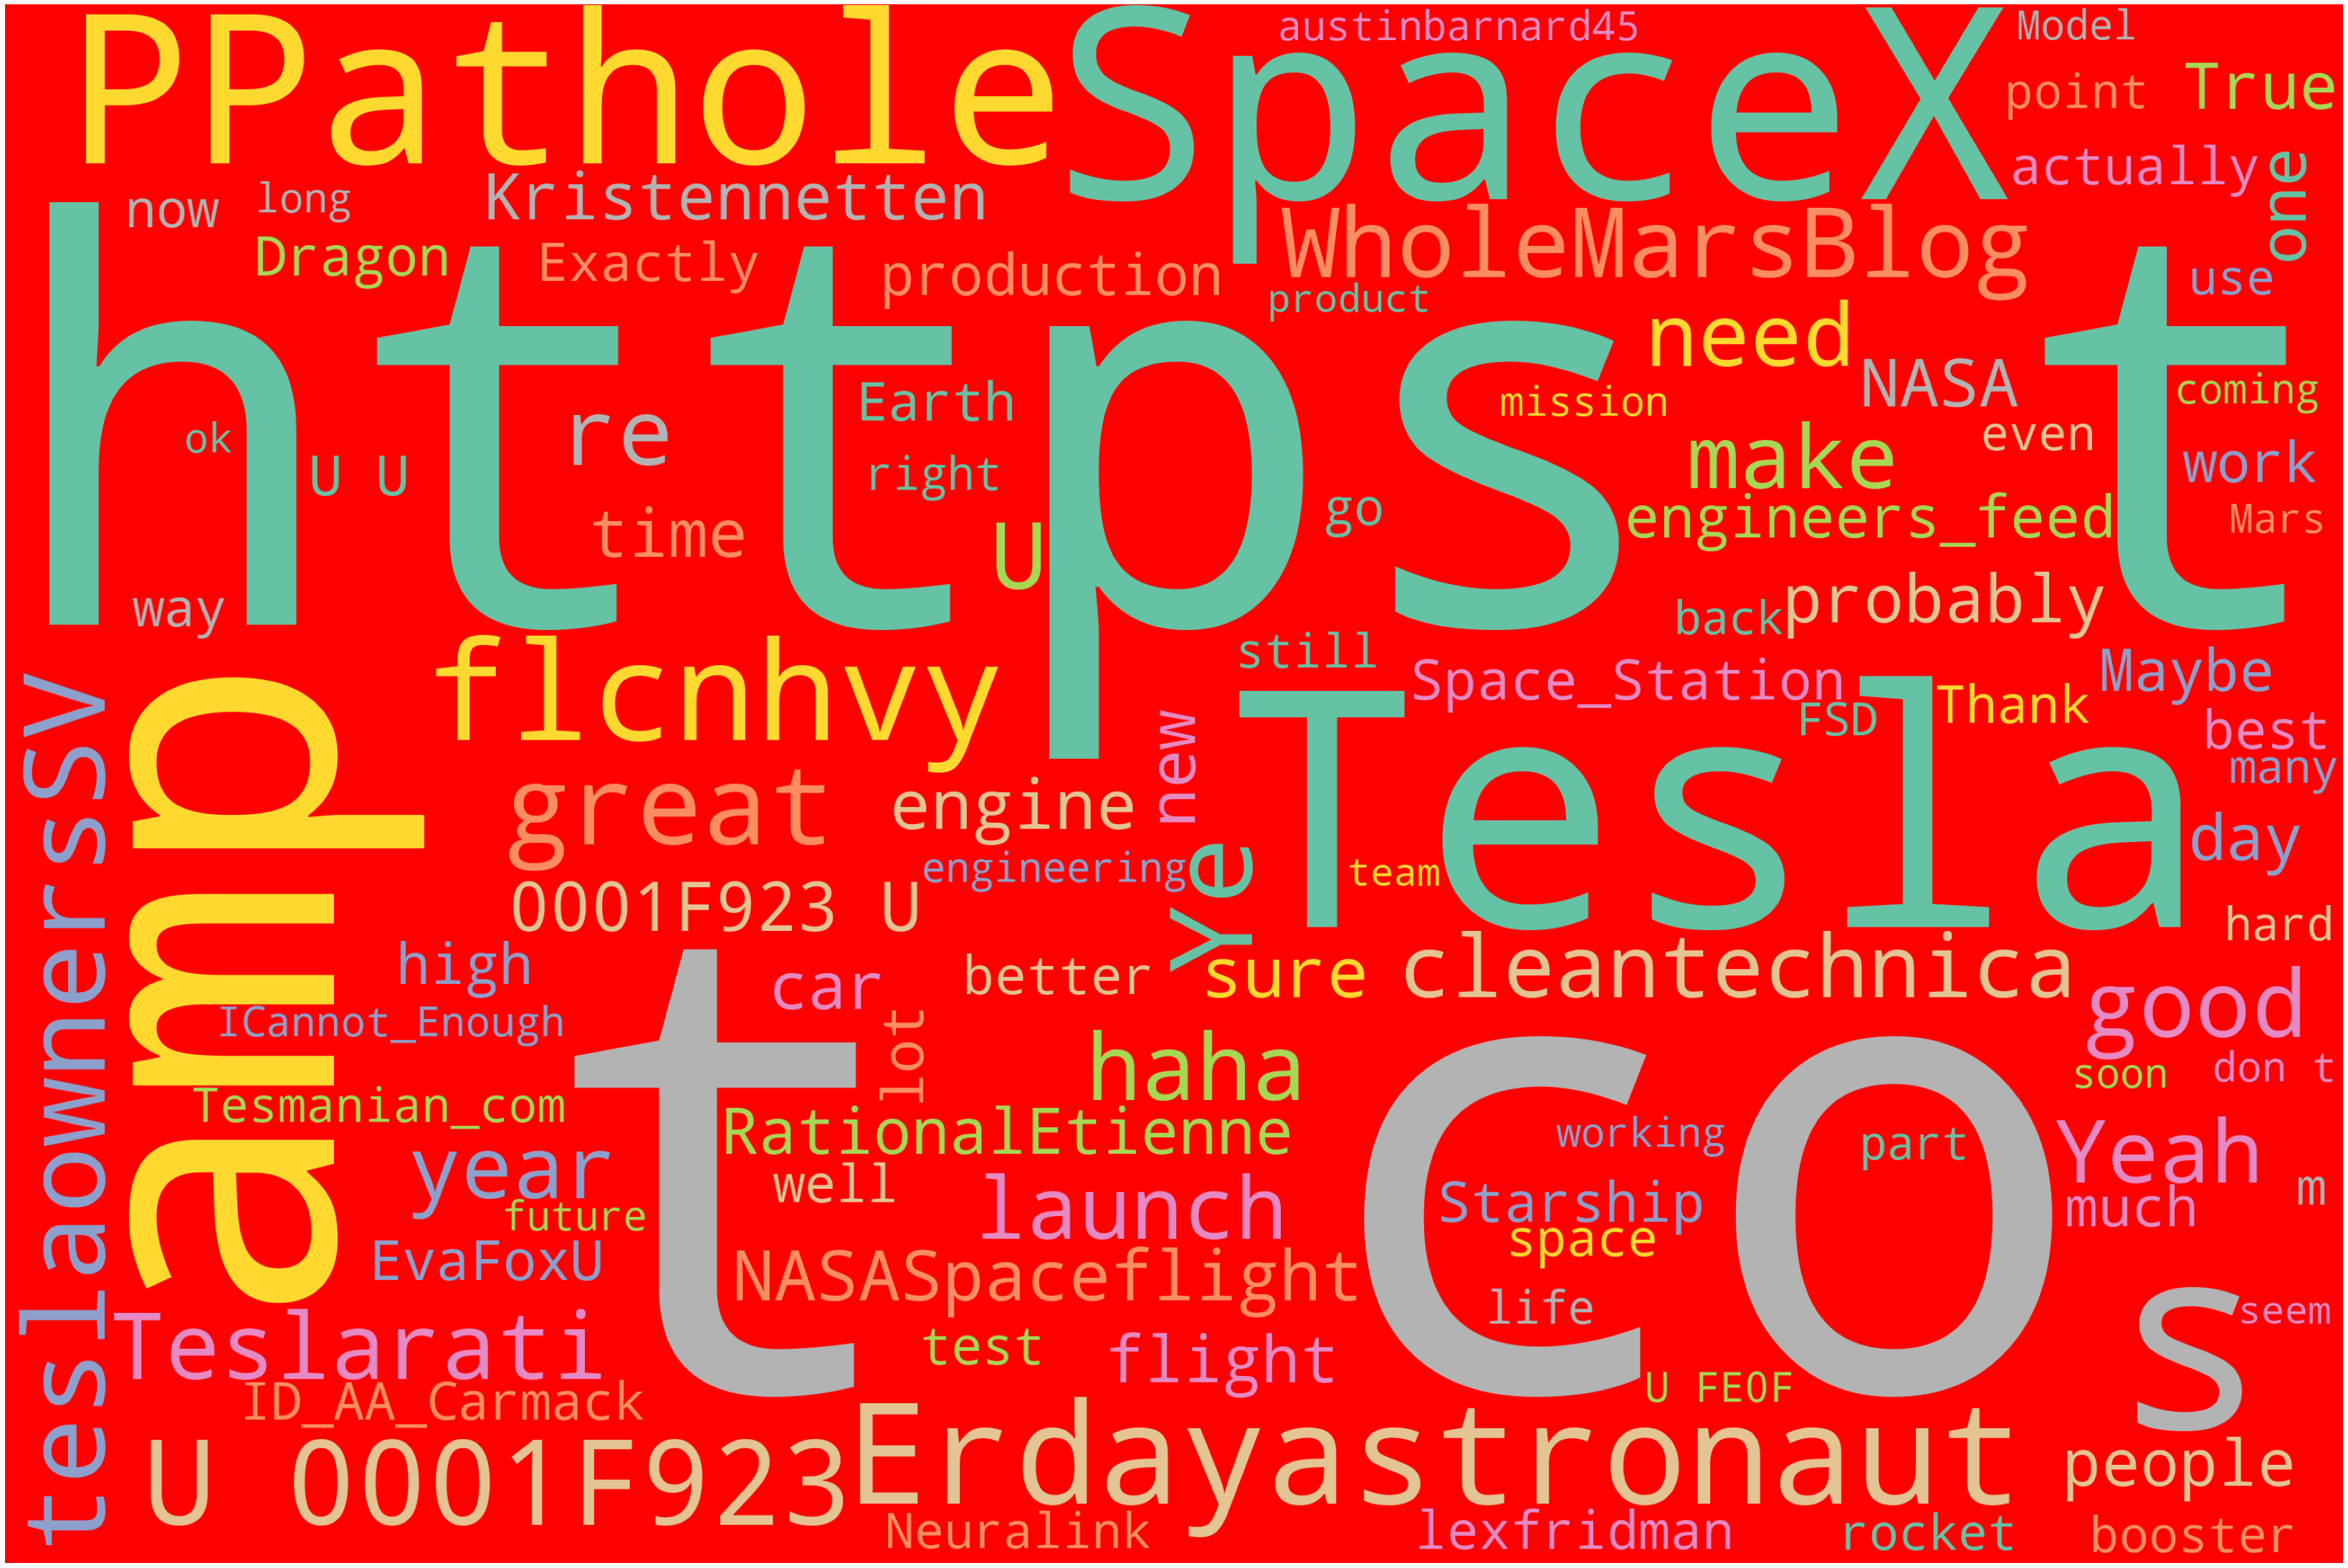

In [56]:
# Generate wordcloud
wordcloud = WordCloud(width = 3000, 
                      height = 2000,
                      background_color='red',
                      max_words=100,
                      colormap='Set2',
                      stopwords=stopwords).generate(text)
# Plot
plot_cloud(wordcloud)